# BBC Articles_Topic Modeling using NLP

Topic Modelling is the process of extracting major themes from a given corpus of text data. In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents.

### Importing Libraries

In [ ]:
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)


import nltk
from nltk.corpus import stopwords
import string
import re
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain

### Importing Dataset

### About Data
We have data set with information from 2,225 articles from the BBC, divided into 5 sections.

Mount the drive to collab file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### For 'business' category/topic

In [ ]:
import os
import csv

dirpath = '/content/drive/MyDrive/Tegger_Internship/bbc/business'
output = '/content/drive/MyDrive/Tegger_Internship/bbc/Bfile.csv'
with open(output, 'w') as outfile:
    csvout = csv.writer(outfile)
    csvout.writerow(['FileName', 'Content'])

    files = os.listdir(dirpath)

    for filename in files:
        with open(dirpath + '/' + filename) as afile:
            csvout.writerow([filename, afile.read()])
            afile.close()

    outfile.close()

#### For 'entertainment' category/topic

In [ ]:
import os
import csv

dirpath = '/content/drive/MyDrive/Tegger_Internship/bbc/entertainment'
output = '/content/drive/MyDrive/Tegger_Internship/bbc/Efile.csv'
with open(output, 'w') as outfile:
    csvout = csv.writer(outfile)
    csvout.writerow(['FileName', 'Content'])

    files = os.listdir(dirpath)

    for filename in files:
        with open(dirpath + '/' + filename) as afile:
            csvout.writerow([filename, afile.read()])
            afile.close()

    outfile.close()

#### For 'politics' category/topic

In [ ]:
import os
import csv

dirpath = '/content/drive/MyDrive/Tegger_Internship/bbc/politics'
output = '/content/drive/MyDrive/Tegger_Internship/bbc/Pfile.csv'
with open(output, 'w') as outfile:
    csvout = csv.writer(outfile)
    csvout.writerow(['FileName', 'Content'])

    files = os.listdir(dirpath)

    for filename in files:
        with open(dirpath + '/' + filename) as afile:
            csvout.writerow([filename, afile.read()])
            afile.close()

    outfile.close()

#### For 'sport' category/topic

In [ ]:
import os
import csv

dirpath = '/content/drive/MyDrive/Tegger_Internship/bbc/sport'
output = '/content/drive/MyDrive/Tegger_Internship/bbc/Sfile.csv'
with open(output, 'w') as outfile:
    csvout = csv.writer(outfile)
    csvout.writerow(['FileName', 'Content'])

    files = os.listdir(dirpath)

    for filename in files:
        with open(dirpath + '/' + filename, encoding='utf8',errors='ignore') as afile:
            csvout.writerow([filename, afile.read()])
            afile.close()

    outfile.close()

#### For 'tech' category/topic

In [ ]:
import os
import csv

dirpath = '/content/drive/MyDrive/Tegger_Internship/bbc/tech'
output = '/content/drive/MyDrive/Tegger_Internship/bbc/Tfile.csv'
with open(output, 'w') as outfile:
    csvout = csv.writer(outfile)
    csvout.writerow(['FileName', 'Content'])

    files = os.listdir(dirpath)

    for filename in files:
        with open(dirpath + '/' + filename) as afile:
            csvout.writerow([filename, afile.read()])
            afile.close()

    outfile.close()

In [ ]:
Bfile= pd.read_csv("/content/drive/MyDrive/Tegger_Internship/bbc/Bfile.csv")
Efile= pd.read_csv("/content/drive/MyDrive/Tegger_Internship/bbc/Efile.csv")
Pfile= pd.read_csv("/content/drive/MyDrive/Tegger_Internship/bbc/Pfile.csv")
Tfile= pd.read_csv("/content/drive/MyDrive/Tegger_Internship/bbc/Tfile.csv")
Sfile= pd.read_csv("/content/drive/MyDrive/Tegger_Internship/bbc/Sfile.csv")

Append a new column with name 'Topic' which wil determine the category

In [ ]:
Bfile['Topic']= 'business'
Efile['Topic']= 'entertainment'
Pfile['Topic']= 'politics'
Tfile['Topic']= 'tech'
Sfile['Topic']= 'sport'

Create a New Dataframe

In [ ]:
df= pd.concat([Bfile,Efile,Pfile,Tfile,Sfile], ignore_index=True)

In [ ]:
df.Topic.unique()

array(['business', 'entertainment', 'politics', 'tech', 'sport'],
      dtype=object)

In [ ]:
# bbc will be the new dataframe which will consist of all the topics along with the content of the article. 
bbc= df

To convert the dataframe into a csv file

In [ ]:
from google.colab import files
bbc.to_csv('bbc_data.csv', index=False) 
files.download('bbc_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
bbc= pd.read_csv('/content/drive/MyDrive/Tegger_Internship/bbc/bbc_data.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
bbc['Topic_ID'] = LE.fit_transform(bbc['Topic'])
print(bbc)

     FileName  ... Topic_ID
0     027.txt  ...        0
1     011.txt  ...        0
2     019.txt  ...        0
3     016.txt  ...        0
4     003.txt  ...        0
...       ...  ...      ...
2220  484.txt  ...        3
2221  492.txt  ...        3
2222  483.txt  ...        3
2223  509.txt  ...        3
2224  501.txt  ...        3

[2225 rows x 4 columns]


Now we will create a dataframe consisting ofTopic and respective Topic_ID.

In [ ]:
topic_id_df = bbc[['Topic', 'Topic_ID']].drop_duplicates().sort_values('Topic_ID')
topic_id_df

,Topic,Topic_ID
0,business,0
510,entertainment,1
896,politics,2
1714,sport,3
1313,tech,4


In [ ]:
df= bbc.groupby('Topic').Topic_ID.count()
df

Topic
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: Topic_ID, dtype: int64

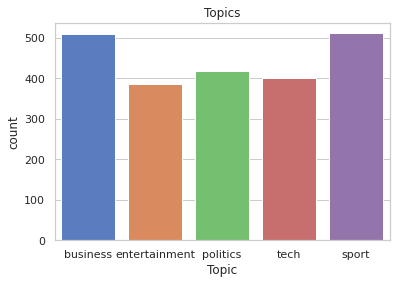

In [ ]:
sns.set(style="whitegrid")
sns.countplot(x=bbc["Topic"], palette="muted")
plt.title("Topics")
plt.show()

### Text Preprocessing

In this section we will process the column named 'Content' which contains the raw text of the articles posted by bbc.

We will basically peform the text preprocessing by using the well known nltk library. In order to do this we have imported the necessary libraries into out notebook.

We need to clean the column Content.Text cleaning can be done by:

Converting all the characters in Lowercase.
Removing characters apart from A-Z and a-z.
Removing the hashtags # if any.
Removing the stop words
The class WordNetLemmatizer() is used for Lemmatization. Lemmatization is a process of reducing inflected words to their respective lemmatized words which can be easily understood by human as well(Meaningful Representation.)

We will apply Stemming to the data.

In the end, we will create a list 'corpus' where we will store all these tweets.

In [ ]:
bbc.head()

,FileName,Content,Topic,Topic_ID
0,027.txt,"Steel firm 'to cut' 45,000 jobs\n\nMittal Stee...",business,0
1,011.txt,Ask Jeeves tips online ad revival\n\nAsk Jeeve...,business,0
2,019.txt,India widens access to telecoms\n\nIndia has r...,business,0
3,016.txt,China keeps tight rein on credit\n\nChina's ef...,business,0
4,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business,0


Remove Punctuations

In [ ]:
#Remove the punctuations present in the text
import string
def remove_punctuation(row):
  row = row.lower()
  rmv_punct=''.join([words for words in row if words not in string.punctuation])
  return rmv_punct

In [ ]:
bbc['Content']= bbc['Content'].apply(lambda x: remove_punctuation(x))

In [ ]:
bbc.head()

,FileName,Content,Topic,Topic_ID
0,027.txt,steel firm to cut 45000 jobsmittal steel one o...,business,0
1,011.txt,ask jeeves tips online ad revivalask jeeves ha...,business,0
2,019.txt,india widens access to telecomsindia has raise...,business,0
3,016.txt,china keeps tight rein on creditchinas efforts...,business,0
4,003.txt,yukos unit buyer faces loan claimthe owners of...,business,0


In [ ]:
bbc = bbc.replace('\n','', regex=True)

In [ ]:
bbc['Content']

0       steel firm to cut 45000 jobsmittal steel one o...
1       ask jeeves tips online ad revivalask jeeves ha...
2       india widens access to telecomsindia has raise...
3       china keeps tight rein on creditchinas efforts...
4       yukos unit buyer faces loan claimthe owners of...
                              ...                        
2220    sydney return for heninhardenneolympic champio...
2221    henman  murray claim lta awardstim henman was ...
2222    hewitt survives nalbandian epichome favourite ...
2223    melzer shocks agassi in san josesecond seed an...
2224    ivanovic seals canberra victoryserbias ana iva...
Name: Content, Length: 2225, dtype: object

In [ ]:
def rmv_digit(row):
  no_digit= ''.join([i for i in str(row) if not i.isdigit()]) 
  return no_digit

In [ ]:
bbc['Content']= bbc['Content'].apply(lambda x: rmv_digit(x))

In [ ]:
bbc.head()

,FileName,Content,Topic,Topic_ID
0,027.txt,steel firm to cut jobsmittal steel one of the...,business,0
1,011.txt,ask jeeves tips online ad revivalask jeeves ha...,business,0
2,019.txt,india widens access to telecomsindia has raise...,business,0
3,016.txt,china keeps tight rein on creditchinas efforts...,business,0
4,003.txt,yukos unit buyer faces loan claimthe owners of...,business,0


Remove stop words

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words= set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def rmv_stopwords(row, sw):
  row_split= row.split(' ')
  return [token for token in row_split if token not in sw]


In [ ]:
bbc['Content']= bbc['Content'].apply(lambda x: rmv_stopwords(x, stop_words))

In [ ]:
bbc.head()

,FileName,Content,Topic,Topic_ID
0,027.txt,"[steel, firm, cut, , jobsmittal, steel, one, w...",business,0
1,011.txt,"[ask, jeeves, tips, online, ad, revivalask, je...",business,0
2,019.txt,"[india, widens, access, telecomsindia, raised,...",business,0
3,016.txt,"[china, keeps, tight, rein, creditchinas, effo...",business,0
4,003.txt,"[yukos, unit, buyer, faces, loan, claimthe, ow...",business,0


Lemmatizing of Text

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

lemm = WordNetLemmatizer()

def lemmetizer(row):
  lemm_row= [lemm.lemmatize(i) for i in row]
  return lemm_row

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
bbc['Content']= bbc['Content'].apply(lambda x: lemmetizer(x))

In [ ]:
bbc.head()

,FileName,Content,Topic,Topic_ID
0,027.txt,"[steel, firm, cut, , jobsmittal, steel, one, w...",business,0
1,011.txt,"[ask, jeeves, tip, online, ad, revivalask, jee...",business,0
2,019.txt,"[india, widens, access, telecomsindia, raised,...",business,0
3,016.txt,"[china, keep, tight, rein, creditchinas, effor...",business,0
4,003.txt,"[yukos, unit, buyer, face, loan, claimthe, own...",business,0


In [ ]:
data_words = list(bbc['Content'])

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=3, threshold=30) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=30)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['steel', 'firm', 'cut', 'jobsmittal', 'steel', 'one', 'world_largest', 'steel', 'producer', 'could', 'cut', 'job', 'next', 'five', 'year', 'chief_executive', 'saidthe', 'netherlandsbased', 'company', 'due', 'complete', 'bn', 'acquisition', 'u', 'firm', 'isg', 'next_month', 'making', 'one', 'largest', 'global', 'firm', 'kind', 'however', 'lakshmi', 'mittal', 'told', 'investor', 'combined', 'company', 'shed', 'thousand', 'job', 'indianborn', 'magnate', 'say', 'job_loss', 'would', 'fallmr', 'mittal', 'told', 'u', 'investor', 'acquisition', 'international', 'steel', 'group', 'completed', 'company', 'would', 'aim', 'reduce', 'workforce', 'annually', 'could', 'see', 'workforce', 'trimmed', 'staff', 'investing', 'modernisation', 'employee', 'go', 'mr', 'mittal', 'told', 'conference', 'chicagomittal', 'steel', 'formed', 'last_year', 'mr', 'mittals', 'lnm', 'holding', 'merged', 'dutch', 'firm', 'ispat', 'combination', 'mittal', 'steel', 'isg', 'would', 'annual', 'sale', 'bn_£bn', 'bn_euro', 'p

In [ ]:
print(bigram_mod[data_words[0]])

['steel', 'firm', 'cut', 'jobsmittal', 'steel', 'one', 'world_largest', 'steel', 'producer', 'could', 'cut', 'job', 'next', 'five', 'year', 'chief_executive', 'saidthe', 'netherlandsbased', 'company', 'due', 'complete', 'bn', 'acquisition', 'u', 'firm', 'isg', 'next_month', 'making', 'one', 'largest', 'global', 'firm', 'kind', 'however', 'lakshmi', 'mittal', 'told', 'investor', 'combined', 'company', 'shed', 'thousand', 'job', 'indianborn', 'magnate', 'say', 'job_loss', 'would', 'fallmr', 'mittal', 'told', 'u', 'investor', 'acquisition', 'international', 'steel', 'group', 'completed', 'company', 'would', 'aim', 'reduce', 'workforce', 'annually', 'could', 'see', 'workforce', 'trimmed', 'staff', 'investing', 'modernisation', 'employee', 'go', 'mr', 'mittal', 'told', 'conference', 'chicagomittal', 'steel', 'formed', 'last_year', 'mr', 'mittals', 'lnm', 'holding', 'merged', 'dutch', 'firm', 'ispat', 'combination', 'mittal', 'steel', 'isg', 'would', 'annual', 'sale', 'bn_£bn', 'bn_euro', 'p

Now we will Define functions for stopwords, bigrams, and lemmatization.

In [ ]:

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# def make_trigrams(texts):
#     return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

Now we will form the Bigrams and then initialize the spacy 'en' model while keeping only tagger component

In [ ]:
# Formation of the Bigrams
data_words_bigrams = make_bigrams(data_words)

# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# perform lemmatization by keeping only noun, adjective, verb and adverb
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['steel', 'firm', 'cut', 'jobsmittal', 'steel', 'world_larg', 'steel', 'producer', 'could', 'cut', 'job', 'next', 'year', 'netherlandsbased', 'company', 'due', 'complete', 'bn', 'acquisition', 'firm', 'make', 'large', 'global', 'firm', 'kind', 'however', 'tell', 'investor', 'combine', 'company', 'shed', 'job', 'indianborn', 'magnate', 'say', 'would', 'fallmr', 'tell', 'investor', 'acquisition', 'complete', 'company', 'would', 'aim', 'reduce', 'workforce', 'annually', 'could', 'see', 'trimmed', 'staff', 'invest', 'modernisation', 'employee', 'go', 'tell', 'conference', 'form', 'mittal', 'merge', 'dutch', 'firm', 'ispat', 'combination', 'would', 'sale', 'production', 'capacity', 'mittal', 'spokeman', 'say', 'decision', 'job', 'cut', 'make', 'yet', 'try', 'create', 'sustainable', 'steel', 'industry', 'want', 'invest', 'technology', 'spokesman', 'say', 'mittal', 'steel', 'operation', 'country', 'many', 'business', 'particularly', 'previously', 'state', 'own', 'huge', 'alone', 'large', 'op

Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:5])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 2), (11, 1), (12, 2), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 4), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 2), (31, 1), (32, 3), (33, 1), (34, 1), (35, 2), (36, 1), (37, 2), (38, 1), (39, 1), (40, 3), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 3), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 5), (61, 1), (62, 1), (63, 3), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 3), (70, 1), (71, 1)], [(5, 1), (21, 2), (25, 1), (30, 1), (52, 1), (69, 1), (72, 1), (73, 2), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 3), (100, 1), (101, 1), (102, 3), (103, 1), (104, 1), (10

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('acquisition', 2),
  ('aim', 1),
  ('alone', 1),
  ('annually', 1),
  ('bn', 1),
  ('business', 1),
  ('capacity', 1),
  ('combination', 1),
  ('combine', 1),
  ('company', 3),
  ('complete', 2),
  ('conference', 1),
  ('could', 2),
  ('country', 1),
  ('create', 1),
  ('cut', 3),
  ('decision', 1),
  ('due', 1),
  ('dutch', 1),
  ('employee', 1),
  ('fallmr', 1),
  ('firm', 4),
  ('form', 1),
  ('global', 1),
  ('go', 1),
  ('however', 1),
  ('huge', 1),
  ('indianborn', 1),
  ('industry', 1),
  ('invest', 2),
  ('investor', 2),
  ('ispat', 1),
  ('job', 3),
  ('jobsmittal', 1),
  ('kind', 1),
  ('large', 2),
  ('magnate', 1),
  ('make', 2),
  ('many', 1),
  ('merge', 1),
  ('mittal', 3),
  ('modernisation', 1),
  ('netherlandsbased', 1),
  ('next', 1),
  ('operation', 2),
  ('own', 1),
  ('particularly', 1),
  ('previously', 1),
  ('producer', 1),
  ('production', 1),
  ('reduce', 1),
  ('romania', 1),
  ('sale', 1),
  ('say', 3),
  ('see', 1),
  ('shed', 1),
  ('spokeman', 1),
  

## Model Building

In NLP, the **Latent Dirichlet Allocation (LDA)** is a generative statistical model that enables a series of results to be explained by unobserved classes explaining why individual sections of the data are similar. LDA is a three-level Bayesian hierarchical model in which each object in the array is modeled as a finite mixture over the underlying set of topics.

Gensim is an open-source library for unsupervised topic modeling and natural language processing, using modern statistical machine learning. Gensim is implemented in Python and Cython.

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, random_state=100, 
                                     update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.034*"say" + 0.008*"use" + 0.007*"court" + 0.007*"system" + 0.006*"charge" '
  '+ 0.005*"take" + 0.005*"attack" + 0.005*"would" + 0.005*"case" + '
  '0.005*"claim"'),
 (1,
  '0.010*"penalty" + 0.008*"point" + 0.008*"nadal" + 0.008*"tiebreak" + '
  '0.007*"minute" + 0.006*"lead" + 0.006*"hold" + 0.006*"rise" + 0.006*"earn" '
  '+ 0.006*"pressure"'),
 (2,
  '0.024*"game" + 0.023*"play" + 0.016*"player" + 0.014*"win" + 0.014*"first" '
  '+ 0.012*"take" + 0.011*"good" + 0.011*"go" + 0.009*"match" + 0.009*"set"'),
 (3,
  '0.018*"say" + 0.014*"use" + 0.012*"technology" + 0.011*"people" + '
  '0.008*"user" + 0.007*"service" + 0.007*"also" + 0.007*"make" + 0.007*"firm" '
  '+ 0.007*"new"'),
 (4,
  '0.039*"say" + 0.018*"would" + 0.009*"go" + 0.009*"could" + 0.008*"make" + '
  '0.008*"come" + 0.007*"side" + 0.007*"want" + 0.007*"people" + '
  '0.006*"think"')]


## Evaluating the Model

**Perplexity** is a way of evaluating language models. A language model is a probability distribution over entire sentences or texts. It is an evaluation metric for a language model. Lower the perplexity better is the model.

A sequence of statements or statements is said to be coherent if they support each other.**Topic Coherence** metrics, scores a single topic by calculating the degree of semantic similarity between high-scoring words in the topic. These measurements help differentiate between topics that are semantically interpretable and topics that are mathematical inference objects.


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.110963435242112

Coherence Score:  0.3807406211561901


## Model Visualization

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.141843 -0.009130       1        1  35.565429
2     -0.135015  0.221186       2        1  21.185831
3      0.016015 -0.091984       3        1  20.579678
0     -0.026720 -0.205451       4        1  17.569257
1      0.287563  0.085379       5        1   5.099805, topic_info=             Term         Freq        Total Category  logprob  loglift
971          game  1707.000000  1707.000000  Default  30.0000  30.0000
735          play  1677.000000  1677.000000  Default  29.0000  29.0000
53            say  7434.000000  7434.000000  Default  28.0000  28.0000
101        player  1176.000000  1176.000000  Default  27.0000  27.0000
62     technology   754.000000   754.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
20951     roddick    61.080148   434.749208   Topic5  -5.5391   1.0134
282         force    55.349876   284.253034   Topic5  -5.6377   1.3398
70           year    64.273884  1515.374939   Topic5  -5.4882  -0.1843
223         level    54.107196   292.221517   Topic5  -5.6604   1.2894
259         ahead    53.985613   281.889919   Topic5  -5.6626   1.3232

[341 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
21216      5  0.965676      ace
258        1  0.173380   action
258        2  0.194524   action
258        4  0.625860   action
126        1  0.730483      add
...      ...       ...      ...
70         4  0.030356     year
70         5  0.042234     year
5535       1  0.051998  yearold
5535       2  0.943958  yearold
187        2  0.995980    young

[550 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 1, 2])